In [1]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [268]:
# Naimportovanie kniznic
import numpy as np
import pandas as pd


from plotnine import *
import plotnine
plotnine.options.figure_size = (5.2,3.2)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [269]:
#Nacitanie jednotlivych datasetov do premennych
ass = pd.read_csv("DATA/assessments.csv")
courses = pd.read_csv("DATA/courses.csv")
results = pd.read_csv("DATA/studentAssessment.csv")
info = pd.read_csv("DATA/studentInfo.csv")
reg = pd.read_csv("DATA/studentRegistration.csv")
vle = pd.read_csv("DATA/studentVle.csv")
materials = pd.read_csv("DATA/vle.csv")

In [270]:
#V tejto casti je rozobraty dataset s nazvom Ass

In [271]:
#Zobrazenie informacii o datasete ass
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [272]:
#Vypis 5 riadkov datasetu ass
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [273]:
#Tu som si vypisala pocet chybajucich hodnot v datasete ass
#Vidime, ze dataset ass obsahuje 11 chybajucich hodnot atributu Date
ass.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [274]:
#Dataset ass som si zgrupila prostrednictvom atributov code_module a code_presentation
#Atribut total_weight prezentuje sumu atributu weight v jednotlivych moduloch a prezentaciach
#Vidime dva zaujimave fakty a to total_weight = 300 v pripade modulu CCC a total_weight = 100 v pripade modulu GGG co je nestandartne preto som sa nato pozrela blizsie
ass\
.groupby(['code_module','code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

In [275]:
#V tomto vypise vidime opat zgrupenie prostrednictvom atributov code_module, code_presentation a assessment_type
#Dalej je tu vypis assessment_type = Exam, cize pripady skusok
#vaha skusky (Exam) je 100
#v pripade modulu CCC vidime vahu Exam 200 co by mohlo byt, ze v tomto module su az dva typy hodnotenie alebo respektive skusky Exam (assessment_type moze nadobudat hodnoty TMA, CMA a Exam)

ass[ass['assessment_type'] == 'Exam']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation assessment_type              
AAA         2013J             Exam                    100.0
            2014J             Exam                    100.0
BBB         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
CCC         2014B             Exam                    200.0
            2014J             Exam                    200.0
DDD         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
EEE         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
FFF         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
GGG         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0

In [276]:
#Vypis, kolko zadani typy Exam bolo v jednotlivych moduloch
#Vidime, ze v pripade modulu CCC bolo zadani typu Exam dva, co len potvrdilo moju domnienku. To je dovod preco je vaha pri module CCC az 300
ass[ass['assessment_type'] == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]\
.groupby(['code_module', 'code_presentation'])\
.count()

id_assessment
code_module code_presentation               
AAA         2013J                          1
            2014J                          1
BBB         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
CCC         2014B                          2
            2014J                          2
DDD         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
EEE         2013J                          1
            2014B                          1
            2014J                          1
FFF         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
GGG         2013J                          1
            2014B                          1
            2014J                          1

In [277]:
#Tu som riesila modul GGG, ktory ma vahu 100 nie 200
#Nechala som si vypisat sumu vah v pripade ze sa assessment_type nerovna Exam, teda ze ide o skusku TMA alebo CMA
#Vidime v module GGG hodnotu total_weight 0 co hovori o tom, ze TMA a CMA v tomto module neboli hodnotene
ass[ass['assessment_type'] != 'Exam']\
.groupby(['code_module', 'code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     100.0
            2014J                     100.0
BBB         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
CCC         2014B                     100.0
            2014J                     100.0
DDD         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
EEE         2013J                     100.0
            2014B                     100.0
            2014J                     100.0
FFF         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
GGG         2013J                       0.0
            2014B                       0.0
            2014J                       0.0

In [278]:
#tu je detailnejsi vypis modulu GGG, konkretne sum vah v ramci jednotlivych typov zadani
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0

In [279]:
#je tam tolko CMA pri GGG ktore maju 0 weight
ass[(ass['assessment_type'] == 'CMA') & (ass['weight'] == 0) & (ass['code_module'] == 'GGG')]['weight'].count()

18

In [280]:
#tolko je TMA pri GGG ktore maju 0 weight
ass[(ass['assessment_type'] == 'TMA') & (ass['weight'] == 0) & (ass['code_module'] == 'GGG')]['weight'].count()

9

In [281]:
#Vypis hodnot kde sa TMA v pripade modulu GGG rovna 0
ass[(ass['assessment_type'] == 'TMA') & (ass['weight'] == 0)]


,code_module,code_presentation,id_assessment,assessment_type,date,weight
48,BBB,2014J,15020,TMA,19.0,0.0
182,GGG,2013J,37415,TMA,61.0,0.0
183,GGG,2013J,37416,TMA,124.0,0.0
184,GGG,2013J,37417,TMA,173.0,0.0
192,GGG,2014B,37425,TMA,61.0,0.0
193,GGG,2014B,37426,TMA,117.0,0.0
194,GGG,2014B,37427,TMA,166.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [282]:
#Vypis hodnot kde sa CMA v pripade modulu GGG rovna 0
ass[(ass['assessment_type'] == 'CMA') & (ass['weight'] == 0)]


,code_module,code_presentation,id_assessment,assessment_type,date,weight
124,FFF,2013B,34865,CMA,222.0,0.0
125,FFF,2013B,34866,CMA,222.0,0.0
126,FFF,2013B,34867,CMA,222.0,0.0
127,FFF,2013B,34868,CMA,222.0,0.0
128,FFF,2013B,34869,CMA,222.0,0.0
129,FFF,2013B,34871,CMA,222.0,0.0
130,FFF,2013B,34870,CMA,222.0,0.0
137,FFF,2013J,34878,CMA,236.0,0.0
138,FFF,2013J,34879,CMA,236.0,0.0
139,FFF,2013J,34880,CMA,236.0,0.0


In [283]:
#Vahy by mali byt vsade suctom 200 ako to vidime napriklad v pripade modulu BBB
ass[ass['code_module'] == 'BBB']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight',sum))

weight_by_type
code_module code_presentation assessment_type                
BBB         2013B             CMA                         5.0
                              Exam                      100.0
                              TMA                        95.0
            2013J             CMA                         5.0
                              Exam                      100.0
                              TMA                        95.0
            2014B             CMA                         5.0
                              Exam                      100.0
                              TMA                        95.0
            2014J             Exam                      100.0
                              TMA                       100.0

In [284]:
#Takymto vypoctom som dopocitala vahy v pripade modulu GGG, aby mi to sedelo a mala som suctom vahy v jednotlivych prezentaciach modulu GGG 200
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='TMA'),'weight'] = (94/3)
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='CMA'),'weight'] = (1)

In [285]:
#Kontrola ci to sedi a su vahy v ramci modulu GGG 200
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         6.0
                              Exam                      100.0
                              TMA                        94.0
            2014B             CMA                         6.0
                              Exam                      100.0
                              TMA                        94.0
            2014J             CMA                         6.0
                              Exam                      100.0
                              TMA                        94.0

In [286]:
#Tu uz vidime opat zgrupnuty dataset ass prostrednictvom atributov code_module a code_presentation a vypis vah v ramci jednotlivych prezentaciach moduloch
ass\
.groupby(['code_module','code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

In [287]:
#Nahradila som chybajuce hodnoty atributu date hodnotami atributu 'modele_presentation_length' z tabulky courses 
ass.loc[(ass.code_module == 'AAA') & (ass.code_presentation == '2013J') & (ass.assessment_type == 'Exam'),'date'] = 268
ass.loc[(ass.code_module == 'AAA') & (ass.code_presentation == '2014J') & (ass.assessment_type == 'Exam'),'date'] = 269
ass.loc[(ass.code_module == 'BBB') & (ass.code_presentation == '2013B') & (ass.assessment_type == 'Exam'),'date'] = 240
ass.loc[(ass.code_module == 'BBB') & (ass.code_presentation == '2013J') & (ass.assessment_type == 'Exam'),'date'] = 268
ass.loc[(ass.code_module == 'BBB') & (ass.code_presentation == '2014B') & (ass.assessment_type == 'Exam'),'date'] = 234
ass.loc[(ass.code_module == 'BBB') & (ass.code_presentation == '2014J') & (ass.assessment_type == 'Exam'),'date'] = 262
ass.loc[(ass.code_module == 'CCC') & (ass.code_presentation == '2014B') & (ass.assessment_type == 'Exam'),'date'] = 241
ass.loc[(ass.code_module == 'DDD') & (ass.code_presentation == '2014J') & (ass.assessment_type == 'Exam'),'date'] = 262
ass.loc[(ass.code_module == 'CCC') & (ass.code_presentation == '2014J') & (ass.assessment_type == 'Exam'),'date'] = 269

In [288]:
#funckia compareCols porovnava dva subory udajov, vypise aky stlpec maju oba datasety spolocny a kolko hodnot z df1 je v df2 v ramci spolocneho atributu

def compareCols(df1, df2):
    '''
    Check what columns are shared between two dataframes
    and count values of df1 present and absent in df2 (in the shared
    columns)
    '''

    # Zobrazi mi to zdielane stplce oboch datasetov
    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    #Najde meno stlpca ktory je pre oba datasety spolocnz
    diffDict = set(df1Columns) & set(df2Columns)
    
    #Vypis zdielaneho stlpca
    print('Shared columns : ', diffDict, '\n')

    # Vytvori sa list premennej diffDict teda zdielaneho stlpca/stlpcov
    diffList = list(diffDict)
    #V tomto for cykle sa potom porovnavaju hodnoty v ramci zdielaneho stlpca oboch datasetov a vypise sa kolko hodnot maju spolocnych a kolko odlisnych
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Check if values are present in both dataframes:')
        print(x, '\n')
#Ja som v tomto pripade porovnala datasety ass a result
#Ako vidime zdielaju stlpec id_assessment
#188 zaznamov zdielaneho atributu z datasetu ass je v datasete results
#18 zaznamov zdielaneho atributu z datasetu ass nie je v datasete results
compareCols(ass, results)

Shared columns :  {'id_assessment'} 

Check if values are present in both dataframes:
id_assessment
True     188
False     18
Name: count, dtype: int64 



In [289]:
#Funkcia findDiffValues ako nam o tom napovie jej nazov vypisuje prave hodnoty ktore nie su v df2 ale su v df1

def findDiffValues(df1, df2, col):
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Porovname a najdeme rozdielne hodnoty
    diff = set(df1_IDs).difference(set(df2_IDs))
    #vypiseme pocet rozdielnych hodnot
    numberDiff = len(diff)

    print("Values from df1 not in df2: " + str(diff))
    print("Number of missing values: " + str(numberDiff))
#V tomto pripade mi vypisalo 18 hodnot ktore su v datasete ass alebo nie su v datasete result
findDiffValues(ass, results, 'id_assessment')

Values from df1 not in df2: {30723, 1763, 34885, 15014, 37444, 14990, 30713, 37424, 15025, 34898, 37434, 40087, 34872, 40088, 15002, 1757, 30718, 34911}
Number of missing values: 18


In [290]:
#tato funkcia nadvazuje na funkciu findDiffValues, s tym rozdielom ze nevypise len tie konkretne hodnoty v ramci zdielaneho atributu ale komplet udaje z datasetu aj s ostatnymi atributmi

def printDiffValues(df1, df2, col):
    
    
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Porovna a najde rozdielne hodnoty
    diff = set(df1_IDs).difference(set(df2_IDs))
    
    # Zobrazi všetky hodnoty df1, ktoré nie sú prítomné v df2
    missingList = list(diff)
    
    missingDf = df1[df1[col].isin(missingList)]

    return missingDf
#A tu je len vypis 18 hodnot ktore su v datasete ass alebo nie su v datasete result, ale uz nie jednotlivo ale celkovo s ostatnymi atributmi
printDiffValues(ass, results, 'id_assessment')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,268.0,100.0
11,AAA,2014J,1763,Exam,269.0,100.0
23,BBB,2013B,14990,Exam,240.0,100.0
35,BBB,2013J,15002,Exam,268.0,100.0
47,BBB,2014B,15014,Exam,234.0,100.0
53,BBB,2014J,15025,Exam,262.0,100.0
63,CCC,2014B,40087,Exam,241.0,100.0
73,CCC,2014J,40088,Exam,269.0,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0


In [291]:
#Assessment result
results.head(10)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
5,1752,45462,20,0,70.0
6,1752,45642,18,0,72.0
7,1752,52130,19,0,72.0
8,1752,53025,9,0,71.0
9,1752,57506,18,0,68.0


In [292]:
#results[results['score'].isnull()]


In [293]:
#Vypis informacii o datasete results
results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [294]:
# Tu som sa pozrela na chybajuce hodnoty v ramci datasetu results a vidime 173 chybajucich hodnot atributu score
results.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [295]:
#nulove skore budeme hodnotit ako to ze to student proste neodovzdal cize vsetky nahradime nulami 
results.fillna(0, inplace=True)

In [296]:
#Vypisanie prvych 5 riadkov datasetu courses
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [297]:
#Vypis suctu chybajucich hodnot datasetu courses
#Vidime, ze tu nie su ziadne chybajuce hodnoty
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [298]:
#Info o datasete courses
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [299]:
#Vypisanie prvych 5 riadkov datasetu reg
reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [300]:
#Vypis suctu chybajucich hodnot datasetu reg
#Vidime, ze tu je 45 chybajucich hodnot atributu date_registration a 22 521 chybajucich hodnot atributu date_enregistration
reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [301]:
#vsetky Nan hodnoty z atributu date_unregistration sme nahradili 0 lebo to znamena ze ukoncili kurz ked maju em
#reg.fillna(0, inplace=True)

In [302]:
#Vyuzitie funkcie compareCols na porovnanie tychto datsetov
#vidime ze zdielaju stlpec id_student
compareCols(reg, results)

Shared columns :  {'id_student'} 

Check if values are present in both dataframes:
id_student
True     26746
False     5847
Name: count, dtype: int64 



In [303]:
#Vyuzitie funkcie compareCols na porovnanie tychto datsetov
#vidime ze zdielaju stlpec id_student
compareCols(info, results)

Shared columns :  {'id_student'} 

Check if values are present in both dataframes:
id_student
True     26746
False     5847
Name: count, dtype: int64 



In [304]:
#Zobrazenie prvych piatich riadkov datasetu materials
materials.head()


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [305]:
#Vypis suctu chybajucich hodnot datasetu materials
#Vidime, ze tu je 5243 chybajucich hodnot aj atributu week_from aj atributu week_to
materials.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [306]:
#Zobrazenie informacii o datasete materials
materials.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [307]:
#Zobrazenie prvych piatich riadkov datasetu vle
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [308]:
#Vypis chubajucich hodnot v ramci jednotlivych atributov
#Tento dataset neobsahuje ziadne chybajuce hodnoty
vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [309]:
#Zobrazenie informacii o datasete vle
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [310]:
#Zobrazenie prvych piatich riadkov datasetu info
info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [311]:
#Vypis chubajucich hodnot v ramci jednotlivych atributov datasetu info
#Tento dataset obsahuje 1111 chybajucich hodnot v ramci atributu imd_band
info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [312]:
#porovnanie datasetov materials a vle pomocou funkcie compareCols
compareCols(materials, vle)

Shared columns :  {'code_module', 'id_site', 'code_presentation'} 

Check if values are present in both dataframes:
code_module
True    6364
Name: count, dtype: int64 

Check if values are present in both dataframes:
id_site
True     6268
False      96
Name: count, dtype: int64 

Check if values are present in both dataframes:
code_presentation
True    6364
Name: count, dtype: int64 



In [313]:
####PRVE SPAJANIE TABULIEK

In [314]:
# Vytvorenie tabulky VLEmaterials vnutornym spojenim datasetov vle a materials na zaklade atributov code_module, code_presentation a id_site
VLEmaterials = pd.merge(vle, materials, on=['code_module', 'code_presentation', 'id_site'], how='inner')
# Vymazanie stlpcov week_from a week_to lebo su na 82 percent prazdne
#Vymazala som aj atribut date
VLEmaterials.drop(columns=['week_from', 'week_to', 'date'], inplace=True)

VLEmaterials.head()

,code_module,code_presentation,id_student,id_site,sum_click,activity_type
0,AAA,2013J,28400,546652,4,forumng
1,AAA,2013J,28400,546652,1,forumng
2,AAA,2013J,28400,546652,1,forumng
3,AAA,2013J,28400,546652,8,forumng
4,AAA,2013J,30268,546652,3,forumng


In [315]:
#pridanie atributu total_click do tabulky VLEmaterials
#Tento atribut jednoducho spocitava sumu kliknuti studentov v ramci modulu a prezentacie
#podla tohto atributu mozeme pozorovat ako ktory student interagoval so vzdelavacou platfrmou a bol aktivny
VLEmaterials\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))

total_click
code_module code_presentation id_student             
AAA         2013J             11391               934
                              28400              1435
                              30268               281
                              31604              2158
                              32885              1034
...                                               ...
GGG         2014J             2640965              41
                              2645731             893
                              2648187             312
                              2679821             275
                              2684003             616

[29228 rows x 1 columns]

In [316]:
#Tabulka total_click_per_student obsahuje atribut total_click, ktory som popisala vyssie
total_click_per_student = VLEmaterials\
.groupby(['code_module', 'code_presentation', 'id_student'])\
.agg(total_click = ("sum_click",sum))\
.reset_index()

total_click_per_student.head(7)

,code_module,code_presentation,id_student,total_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
5,AAA,2013J,38053,2445
6,AAA,2013J,45462,1492


In [317]:
#Porovnanie datasetov reg a courses pomocou funkcie compareCols
#vsetky code module a code presentation su v student registration a courses rovnake
#date_registration by mohol byt prediktor lebo vlastne ked sa student prihlasil do kurzu 159 dni pred zacatim mohol by mat vacsi zaujem ako niekto kto 53
compareCols(reg, courses)

Shared columns :  {'code_module', 'code_presentation'} 

Check if values are present in both dataframes:
code_module
True    32593
Name: count, dtype: int64 

Check if values are present in both dataframes:
code_presentation
True    32593
Name: count, dtype: int64 



In [318]:
#spojenie student registration a courses, vnutornym spojenim na zaklade spolocnych atributov code_module a code_presentation
#Vytvorenie tabulky regCourses
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,268
1,AAA,2013J,28400,-53.0,NaN,268
2,AAA,2013J,30268,-92.0,12.0,268
3,AAA,2013J,31604,-52.0,NaN,268
4,AAA,2013J,32885,-176.0,NaN,268


In [319]:
#Vytvorenie tabulky regCoursesInfo vnutornym spojenim tabuliek regCourses a info na zaklade stlpcov code_module, code_presentation a id_student
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [320]:
#Vytvorenie tabulky assResults vnutornym spojenim tabuliek ass a results na zaklade spolocneho stlpca id_assessment
assResults = pd.merge(ass, results, on=['id_assessment'], how='inner')
# preusporiadanie stlpcov
assResults = assResults[['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'date_submitted', 'weight', 'is_banked', 'score']]

assResults.head(5)

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,78.0
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,70.0
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,72.0
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,69.0
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,79.0


In [321]:
#Zistenie suctu chybajucich hodnot v datasete assResults
assResults.isnull().sum()

id_student           0
code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
date_submitted       0
weight               0
is_banked            0
score                0
dtype: int64

In [322]:
# Vytvorenie kopie tabulky assResults
#ulozenie kopie do premennej scores
scores = assResults
#Zobrazenie 20 riadkov datasetu scores
scores.head(20)


,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,78.0
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,70.0
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,72.0
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,69.0
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,79.0
5,45462,AAA,2013J,1752,TMA,19.0,20,10.0,0,70.0
6,45642,AAA,2013J,1752,TMA,19.0,18,10.0,0,72.0
7,52130,AAA,2013J,1752,TMA,19.0,19,10.0,0,72.0
8,53025,AAA,2013J,1752,TMA,19.0,9,10.0,0,71.0
9,57506,AAA,2013J,1752,TMA,19.0,18,10.0,0,68.0


In [323]:
#Kolko Exam je v jednotlivych code_presentation
#DDD by mal mat jednu a CCC 2
# Count how many exams there are in Results for every module presentation
#scores[scores['assessment_type'] == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]\
#.groupby(['code_module', 'code_presentation'])\
#.nunique()

In [324]:
### Vytvorenie stlpca weight*score ktory predstavuje sucin atributov weight a score
scores['weight*score'] = scores['weight']*scores['score']

scores.head(5)

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score,weight*score
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,78.0,780.0
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,70.0,700.0
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,72.0,720.0
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,69.0,690.0
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,79.0,790.0


In [325]:
#Vypis dlzky datasetu scores
print(len(scores))

173912


In [326]:
#Vytvorenie atributu sum_scores, kde som pridala atribut weightByScore, co predstavuje sumu atributu weight*score v ramci jednotlivych studentov
sum_scores = scores\
.groupby(['id_student', 'code_module','code_presentation'])\
.agg(weightByScore = ('weight*score', sum))\
.reset_index()
sum_scores.head(5)

,id_student,code_module,code_presentation,weightByScore
0,6516,AAA,2014J,6350.0
1,8462,DDD,2013J,3490.0
2,8462,DDD,2014J,4300.0
3,11391,AAA,2013J,8240.0
4,23629,BBB,2013B,1669.0


In [327]:
#Vypis dlzky 
print(len(sum_scores))

25843


In [328]:
#Vytvorenie tabulky total_weight, kde mame len vypis sumy atributu weight prostrednictvom zgrupenia podla atributov code_module a code_presentation
total_weight = ass\
.groupby(['code_module', 'code_presentation'])\
.agg(total_weight = ('weight', sum))\
.reset_index()
total_weight.head(50)

,code_module,code_presentation,total_weight
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,300.0
7,CCC,2014J,300.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [329]:
#odpocitanie 100 od vah 200
total_weight['total_weight'] = total_weight['total_weight']-100
#Module DDD ma 200 kreditov
total_weight.loc[(total_weight.code_module == 'DDD'), 'total_weight'] = 200
total_weight.head(50)

,code_module,code_presentation,total_weight
0,AAA,2013J,100.0
1,AAA,2014J,100.0
2,BBB,2013B,100.0
3,BBB,2013J,100.0
4,BBB,2014B,100.0
5,BBB,2014J,100.0
6,CCC,2014B,200.0
7,CCC,2014J,200.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [330]:
print(len(total_weight))

22


In [331]:

### Vypocet vazeneho skore ###
# najprv som spoila sum_scores and total_weight vnutorne podla atributov code_module a code_presentation, ktore oba datasety zdielaju
score_weights = pd.merge(sum_scores, total_weight, on=['code_module', 'code_presentation'], how='inner')
# Vypocet atributu weighted_score je podiel medzi atributmi weightByScore a total_weight
score_weights['weighted_score'] = score_weights['weightByScore'] / score_weights['total_weight']
#Nakoniec som vymazala pomocne stlpce pomocou ktorych som vypocitala atribut weighted_score atributy weightByScore a total_weight
score_weights.drop(columns=['weightByScore', 'total_weight'], inplace=True)

In [332]:
#Zobrazenie 10 riadkov tabulky score_weights
score_weights.head(10)


,id_student,code_module,code_presentation,weighted_score
0,6516,AAA,2014J,63.5
1,24734,AAA,2014J,47.5
2,26192,AAA,2014J,86.3
3,28061,AAA,2014J,77.4
4,31600,AAA,2014J,55.5
5,46844,AAA,2014J,66.5
6,52765,AAA,2014J,61.5
7,55104,AAA,2014J,71.3
8,58071,AAA,2014J,74.9
9,58316,AAA,2014J,72.9


In [333]:
print(len(score_weights))

25843


In [334]:
#assResults.head(5)

In [335]:
#tabulka lateSubmission vyjadruje mieru oneskoreneho odovzdania
#vypocitame rozdiel medzi deadlinom a actualnym datumom teda medzi atributmi date_submitted a date a pridame to ako atribut late_submission

lateSubmission = assResults.assign(submission_days=assResults['date_submitted']-assResults['date'])
#Vytvorime podmienku ktora ak bude atribut submission_days vacsi ako 0 znamena to ze ziak odovzdal zadanie oneskorene a hodnota atributu late_submission bude False
#Naopak ak bude hodnota atribut submission_days cislo zaporne znamena to ze ziak odovzal ulohu vcas
lateSubmission = lateSubmission.assign(late_submission=lateSubmission['submission_days'] > 0)

lateSubmission.head()

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score,weight*score,submission_days,late_submission
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,78.0,780.0,-1.0,False
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,70.0,700.0,3.0,True
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,72.0,720.0,-2.0,False
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,69.0,690.0,7.0,True
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,79.0,790.0,0.0,False


In [336]:
print(len(lateSubmission))

173912


In [337]:
#tu su prave skusky ktore boli odovzdane oneskorene
lateSubmission[(lateSubmission['assessment_type'] == 'Exam') & (lateSubmission['late_submission'] == True)]

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score,weight*score,submission_days,late_submission
52975,577245,CCC,2014B,24290,Exam,241.0,243,100.0,0,34.0,3400.0,2.0,True
53404,169380,CCC,2014B,24290,Exam,241.0,242,100.0,0,78.0,7800.0,1.0,True
53661,555008,CCC,2014B,24290,Exam,241.0,266,100.0,0,56.0,5600.0,25.0,True
65108,555498,CCC,2014J,24299,Exam,269.0,285,100.0,0,58.0,5800.0,16.0,True
74900,81351,DDD,2013B,25340,Exam,240.0,248,100.0,0,0.0,0.0,8.0,True
75194,532491,DDD,2013B,25340,Exam,240.0,241,100.0,0,49.0,4900.0,1.0,True
75221,538611,DDD,2013B,25340,Exam,240.0,241,100.0,0,51.0,5100.0,1.0,True
75282,548535,DDD,2013B,25340,Exam,240.0,241,100.0,0,60.0,6000.0,1.0,True
87510,391924,DDD,2014B,25361,Exam,241.0,251,100.0,0,69.0,6900.0,10.0,True
87861,631388,DDD,2014B,25361,Exam,241.0,242,100.0,0,78.0,7800.0,1.0,True


In [338]:
#kolko oneskoreni mali konkretni studenti vyjadruje dataset total_lat_per_student
total_late_per_student = lateSubmission\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(total_late_submission = ('late_submission', sum))\
.reset_index()

total_late_per_student.head(10)

,id_student,code_module,code_presentation,total_late_submission
0,6516,AAA,2014J,0
1,8462,DDD,2013J,1
2,8462,DDD,2014J,0
3,11391,AAA,2013J,0
4,23629,BBB,2013B,3
5,23698,CCC,2014J,4
6,23798,BBB,2013J,5
7,24186,GGG,2014B,0
8,24213,DDD,2014B,5
9,24391,GGG,2013J,0


In [339]:
print(len(total_late_per_student))

25843


In [340]:
#Dataset total_count_assessments vyjadruje pocet zadani u jednotlivych studentov
total_count_assessments = lateSubmission[['id_student', 'code_module', 'code_presentation', 'id_assessment']]\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.size()\
.reset_index(name='total_assessments')

total_count_assessments.head()

,id_student,code_module,code_presentation,total_assessments
0,6516,AAA,2014J,5
1,8462,DDD,2013J,3
2,8462,DDD,2014J,4
3,11391,AAA,2013J,5
4,23629,BBB,2013B,4


In [341]:
# Dataset late_rate_per_student vznikol vnutornym spojenim datasetov total_late_per_student a total_count_assessments na zaklade atributoc id_student, code_module a code_presentation

late_rate_per_student = pd.merge(total_late_per_student, total_count_assessments, on=['id_student', 'code_module', 'code_presentation'], how='inner')
#V datasete som vytvorila novy stlpec late_rate, ktory vyjadruje rozdiel medzi atributmi total_late_submission a total_assessments
late_rate_per_student['late_rate'] = late_rate_per_student['total_late_submission'] / late_rate_per_student['total_assessments']
#Odstranila som pomocne stlpce
late_rate_per_student.drop(columns=['total_late_submission', 'total_assessments'], inplace=True)

late_rate_per_student

,id_student,code_module,code_presentation,late_rate
0,6516,AAA,2014J,0.000000
1,8462,DDD,2013J,0.333333
2,8462,DDD,2014J,0.000000
3,11391,AAA,2013J,0.000000
4,23629,BBB,2013B,0.750000
...,...,...,...,...
25838,2698257,AAA,2013J,0.400000
25839,2698535,CCC,2014B,0.750000
25840,2698535,EEE,2013J,0.250000
25841,2698577,BBB,2014J,0.000000


In [342]:
#dataset passRate je kopiou datasetu assResult
#Naviac obsahuje stlpec fail, ktory ma hodnotu False ak je skore studenta viac ako 40 a hodnotu True ak je skore mensie ako 40
passRate = assResults
passRate = passRate.assign(fail=passRate['score'] < 40)

passRate.head(10)

,id_student,code_module,code_presentation,id_assessment,assessment_type,date,date_submitted,weight,is_banked,score,weight*score,fail
0,11391,AAA,2013J,1752,TMA,19.0,18,10.0,0,78.0,780.0,False
1,28400,AAA,2013J,1752,TMA,19.0,22,10.0,0,70.0,700.0,False
2,31604,AAA,2013J,1752,TMA,19.0,17,10.0,0,72.0,720.0,False
3,32885,AAA,2013J,1752,TMA,19.0,26,10.0,0,69.0,690.0,False
4,38053,AAA,2013J,1752,TMA,19.0,19,10.0,0,79.0,790.0,False
5,45462,AAA,2013J,1752,TMA,19.0,20,10.0,0,70.0,700.0,False
6,45642,AAA,2013J,1752,TMA,19.0,18,10.0,0,72.0,720.0,False
7,52130,AAA,2013J,1752,TMA,19.0,19,10.0,0,72.0,720.0,False
8,53025,AAA,2013J,1752,TMA,19.0,9,10.0,0,71.0,710.0,False
9,57506,AAA,2013J,1752,TMA,19.0,18,10.0,0,68.0,680.0,False


In [343]:
print(len(passRate))

173912


In [344]:
#Zoskupila som studentov prostednictvom id_student, code_module a code_presentation a ulozila som to do premennej total_fails_per_student
#tabulka total_fails_per_student vyjadruje pocet neuspechov jednotlivych studentov 
total_fails_per_student = passRate\
.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(total_fails = ("fail",sum))\
.reset_index()

total_fails_per_student.head()

,id_student,code_module,code_presentation,total_fails
0,6516,AAA,2014J,0
1,8462,DDD,2013J,0
2,8462,DDD,2014J,0
3,11391,AAA,2013J,0
4,23629,BBB,2013B,0


In [345]:
print(len(total_fails_per_student))

25843


In [346]:
#Vnutornym spojenim tabuliek total_fails_per_student a total_count_assessments vznikla tabulka fail_rate_per_student
fail_rate_per_student = pd.merge(total_fails_per_student, total_count_assessments, on=['id_student', 'code_module', 'code_presentation'], how='inner')
#Vytvorila som novy stlpec fail_rate, ktory vyjadruje podiel medzi atributmi total_fails a total_assessments z tabulky fail_rate_per_student
fail_rate_per_student['fail_rate'] = fail_rate_per_student['total_fails'] / fail_rate_per_student['total_assessments']
#Odstranila som pomocne stlpce
fail_rate_per_student.drop(columns=['total_fails', 'total_assessments'], inplace=True)

fail_rate_per_student

,id_student,code_module,code_presentation,fail_rate
0,6516,AAA,2014J,0.00
1,8462,DDD,2013J,0.00
2,8462,DDD,2014J,0.00
3,11391,AAA,2013J,0.00
4,23629,BBB,2013B,0.00
...,...,...,...,...
25838,2698257,AAA,2013J,0.00
25839,2698535,CCC,2014B,0.75
25840,2698535,EEE,2013J,0.25
25841,2698577,BBB,2014J,0.00


In [347]:
print(len(fail_rate_per_student))

25843


In [348]:
#Tabulka assessments vznikla najprv spojenim tabuliek score_weights  a late_rate_per_student, a potom som ju vnutorne spojila aj s tabulkou fail_rate_per_student na zaklade atributov id_student, code_module a code_presentation
assessments = pd.merge(score_weights, late_rate_per_student, on=['id_student', 'code_module', 'code_presentation'], how='inner')
assessments = pd.merge(assessments, fail_rate_per_student, on=['id_student', 'code_module', 'code_presentation'], how='inner')

assessments.head()

,id_student,code_module,code_presentation,weighted_score,late_rate,fail_rate
0,6516,AAA,2014J,63.5,0.0,0.0
1,24734,AAA,2014J,47.5,0.8,0.2
2,26192,AAA,2014J,86.3,0.0,0.0
3,28061,AAA,2014J,77.4,0.2,0.0
4,31600,AAA,2014J,55.5,0.6,0.0


In [349]:
print(len(assessments))

25843


In [350]:
#MEGRE ALL TABLES

In [351]:
#Tabulka merged vznikla spojenim tabuliek regCoursesInfo a total_click_per_student
merged = pd.merge(regCoursesInfo, total_click_per_student, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,-53.0,NaN,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,-92.0,12.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,-52.0,NaN,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,-176.0,NaN,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0


In [352]:
#Dalej som tabulku merged este spojila s tabulkou assessments
merged = pd.merge(merged, assessments, on=['id_student', 'code_module', 'code_presentation'], how='left')

merged.head()


,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click,weighted_score,late_rate,fail_rate
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.4,0.0,0.0
1,AAA,2013J,28400,-53.0,NaN,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,65.4,0.4,0.0
2,AAA,2013J,30268,-92.0,12.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,NaN,NaN,NaN
3,AAA,2013J,31604,-52.0,NaN,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.3,0.0,0.0
4,AAA,2013J,32885,-176.0,NaN,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,55.0,1.0,0.4


In [353]:
print(len(merged))

32593


In [354]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merged, test_size=0.2, random_state=42, stratify=merged['code_module'])

In [355]:
#Vypis suctu chybajucich hodnot v tabulke merged
merged.isnull().sum()


code_module                       0
code_presentation                 0
id_student                        0
date_registration                45
date_unregistration           22521
module_presentation_length        0
gender                            0
region                            0
highest_education                 0
imd_band                       1111
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
disability                        0
final_result                      0
total_click                    3365
weighted_score                 6750
late_rate                      6750
fail_rate                      6750
dtype: int64

In [356]:
#Vypis niektorych chubajucich hodnot atributu imd_band tabulky merged
merged\
[merged['imd_band'].isnull()]\
.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click,weighted_score,late_rate,fail_rate
9,AAA,2013J,53025,-179.0,NaN,268,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158.0,79.0,0.0,0.0
17,AAA,2013J,71361,-130.0,NaN,268,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass,2327.0,79.7,0.0,0.0
28,AAA,2013J,104476,-109.0,NaN,268,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass,4777.0,78.9,0.4,0.0
34,AAA,2013J,114017,-29.0,NaN,268,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass,757.0,72.3,0.0,0.0
65,AAA,2013J,172112,-50.0,NaN,268,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass,1939.0,71.1,0.6,0.0


In [357]:
#nasli sme regiony ktore maju NaN hodnotu
#nasla som najviac frekvemtovanu hodnotu za dany region

regions_list = list(merged\
                    [merged['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    result = merged[merged['region'] == i].imd_band.mode()
    print(f'{i} IMD band : \n', result)

North Region IMD band : 
 0    10-20
Name: imd_band, dtype: object
Ireland IMD band : 
 0    0-10%
Name: imd_band, dtype: object
West Midlands Region IMD band : 
 0    0-10%
Name: imd_band, dtype: object
South Region IMD band : 
 0    90-100%
Name: imd_band, dtype: object
South West Region IMD band : 
 0    30-40%
Name: imd_band, dtype: object
North Western Region IMD band : 
 0    0-10%
Name: imd_band, dtype: object
Yorkshire Region IMD band : 
 0    0-10%
Name: imd_band, dtype: object
Scotland IMD band : 
 0    50-60%
Name: imd_band, dtype: object


In [358]:
#nahradila som chybajuce hodnoty atributu imd_band najfrekventovanejsimi hodnotami v ramci daneho regionu respektive oblasti
regions_list = list(merged\
                    [merged['imd_band'].isnull()]['region']\
                    .unique())

for i in regions_list:
    merged['imd_band'] = np.where( ( (merged['imd_band'].isnull()) & (merged['region'] == i) ),
                                           merged[merged['region'] == i].imd_band.mode(),
                                           merged['imd_band']
                                    )

In [359]:
#toto je novy dataframe, ktory obsahuje len hodnoty kde sa date_registration = 0
reg_date_nulls_in_reg = merged\
[merged['date_registration'].isnull()]

In [360]:
# What are their final results?
#column = reg_date_nulls_in_reg['final_result']

#unique, counts = np.unique(column, return_counts = True)

#dict(zip(unique, counts))

In [361]:
#Ziskala som median atributu date_registration tabulky merged
merged.date_registration.median()


-57.0

In [362]:
# Nahradila som chybajuce hodnoty atributu date_registration
merged['date_registration'] = np.where( (merged['date_registration'].isnull()),
                                           merged['date_unregistration'] + merged.date_registration.median(),
                                           merged['date_registration']
                                    )
merged['date_registration'] = np.where( (merged['date_registration'].isnull()),
                                           merged.date_registration.median(),
                                           merged['date_registration']
                                    )

In [363]:
#studenti ktory nemaju ziaden click proste nie je ziadna interakcia, preto som nahradila chybajuce hodnoty nulou
merged['total_click'] = merged['total_click'].replace(np.nan).fillna(0)

In [364]:
#studenti ktory maju zase nulove hodnoty pri weighted score neodoslali ziadne ulohy preto  som nahradila chybajuce hodnoty nulou
merged['weighted_score'] = merged['weighted_score'].replace(np.nan).fillna(0)

In [365]:
#studenti ktori maju nan values pri late submission neodoslali ziadnu ulohu preto som nahradila chybajuce hodnoty jednotkou
merged['late_rate'] = merged['late_rate'].replace(np.nan).fillna(1.0)


In [366]:
#opat studenti nepredlozili ziadne ulohy cize zase je ich akoby miera zlyhania 100 percent, preto som nahradila chybajuce hodnoty jednotkou
merged['fail_rate'] = merged['fail_rate'].replace(np.nan).fillna(1.0)

In [367]:
#Atribut date_registration som vymazala pretoze som ho nepotrebovala 
merged.drop(columns=['date_unregistration'], inplace=True)

In [368]:
#Vypis suctu chybajucich hodnot vysledneho datasetu merged
merged.isnull().sum()


code_module                   0
code_presentation             0
id_student                    0
date_registration             0
module_presentation_length    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
total_click                   0
weighted_score                0
late_rate                     0
fail_rate                     0
dtype: int64

In [369]:
#merged.drop(columns=['late_rate', 'fail_rate'], inplace=True)
merged.head(2)

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click,weighted_score,late_rate,fail_rate
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.4,0.0,0.0
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,65.4,0.4,0.0


In [370]:
#V tejto casti nahradzam hodnoty atributov

In [371]:
#Female je 0 a Male je 1
merged['gender'].replace('F',0,inplace=True)
merged['gender'].replace('M',1,inplace=True)

In [372]:
merged.head(2)

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click,weighted_score,late_rate,fail_rate
0,AAA,2013J,11391,-159.0,268,1,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.4,0.0,0.0
1,AAA,2013J,28400,-53.0,268,0,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,65.4,0.4,0.0


In [373]:
#vypis hodnot atributu region, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["region"].unique())

['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']


In [374]:
#nahradenie hodnot atributu region prostrednictvom funkcie replace cislom 
merged['region'].replace('East Anglian Region',1,inplace=True)
merged['region'].replace('Scotland',2,inplace=True)
merged['region'].replace('North Western Region',3,inplace=True)
merged['region'].replace('South East Region',4,inplace=True)
merged['region'].replace('West Midlands Region',5,inplace=True)
merged['region'].replace('Wales',6,inplace=True)
merged['region'].replace('North Region',7,inplace=True)
merged['region'].replace('South Region',8,inplace=True)
merged['region'].replace('Ireland',9,inplace=True)
merged['region'].replace('South West Region',10,inplace=True)
merged['region'].replace('East Midlands Region',11,inplace=True)
merged['region'].replace('Yorkshire Region',12,inplace=True)
merged['region'].replace('London Region',13,inplace=True)


In [375]:
#kontrola ci som nahradila vsetky hodnoty atributu region
print(merged["region"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [376]:
#vypis hodnot atributu highest_education, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["highest_education"].unique())

['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']


In [377]:
##nahradenie hodnot atributu highest_education pomocou  funkcie replace cislom 
merged['highest_education'].replace('HE Qualification',1,inplace=True)
merged['highest_education'].replace('A Level or Equivalent',2,inplace=True)
merged['highest_education'].replace('Lower Than A Level',3,inplace=True)
merged['highest_education'].replace('Post Graduate Qualification',4,inplace=True)
merged['highest_education'].replace('No Formal quals',5,inplace=True)

In [378]:
#vypis hodnot atributu imd_band, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["imd_band"].unique())

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' '10-20' '60-70%'
 '40-50%' '0-10%']


In [379]:
##nahradenie hodnot atributu imd_band pomocou  funkcie replace cislom 
merged['imd_band'].replace('90-100%',1,inplace=True)
merged['imd_band'].replace('80-90%',2,inplace=True)
merged['imd_band'].replace('70-80%',3,inplace=True)
merged['imd_band'].replace('60-70%',4,inplace=True)
merged['imd_band'].replace('50-60%',5,inplace=True)
merged['imd_band'].replace('40-50%',6,inplace=True)
merged['imd_band'].replace('30-40%',7,inplace=True)
merged['imd_band'].replace('20-30%',8,inplace=True)
merged['imd_band'].replace('10-20',9,inplace=True)
merged['imd_band'].replace('0-10%',10,inplace=True)

In [380]:
#kontrola ci som nahradila vsetky hodnoty atributu imd_band
print(merged["imd_band"].unique())

[ 1  8  7  5  2  3  9  4  6 10]


In [381]:
#vypis hodnot atributu age_band, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["age_band"].unique())

['55<=' '35-55' '0-35']


In [382]:

##nahradenie hodnot atributu age_band pomocou  funkcie replace cislom 
merged['age_band'].replace('55<=',3,inplace=True)
merged['age_band'].replace('35-55',2,inplace=True)
merged['age_band'].replace('0-35',1,inplace=True)

In [383]:
#kontrola ci som nahradila vsetky hodnoty atributu age_band
print(merged["age_band"].unique())

[3 2 1]


In [384]:
#vypis hodnot atributu final_result, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["final_result"].unique())

['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [385]:

##nahradenie hodnot atributu final_result pomocou  funkcie replace cislom 
merged['final_result'].replace('Pass',1,inplace=True)
merged['final_result'].replace('Distinction',1,inplace=True)
merged['final_result'].replace('Withdrawn',0,inplace=True)
merged['final_result'].replace('Fail',0,inplace=True)

In [386]:
#vypis hodnot atributu disability, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["disability"].unique())

['N' 'Y']


In [387]:
##nahradenie hodnot atributu disability pomocou  funkcie replace cislom 
merged['disability'].replace('N',0,inplace=True)
merged['disability'].replace('Y',1,inplace=True)

In [388]:
#vypis hodnot atributu code_presentation, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["code_presentation"].unique())

['2013J' '2014J' '2013B' '2014B']


In [389]:
##nahradenie hodnot atributu code_presentation pomocou  funkcie replace cislom 
merged['code_presentation'].replace('2013J',0,inplace=True)
merged['code_presentation'].replace('2013B',1,inplace=True)
merged['code_presentation'].replace('2014J',2,inplace=True)
merged['code_presentation'].replace('2014B',3,inplace=True)

In [390]:
#vypis hodnot atributu code_module, aby som nahradila vsetky hodnoty pomocou funkcie replace cislom
print(merged["code_module"].unique())

['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


In [391]:
##nahradenie hodnot atributu code_module pomocou  funkcie replace cislom 
merged['code_module'].replace('AAA',1,inplace=True)
merged['code_module'].replace('BBB',2,inplace=True)
merged['code_module'].replace('CCC',3,inplace=True)
merged['code_module'].replace('DDD',4,inplace=True)
merged['code_module'].replace('EEE',5,inplace=True)
merged['code_module'].replace('FFF',6,inplace=True)
merged['code_module'].replace('GGG',7,inplace=True)

In [392]:
#Zobrazenie prvych 5 riadkov datasetu merged
merged.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_click,weighted_score,late_rate,fail_rate
0,1,0,11391,-159.0,268,1,1,1,1,3,0,240,0,1,934.0,82.4,0.0,0.0
1,1,0,28400,-53.0,268,0,2,1,8,2,0,60,0,1,1435.0,65.4,0.4,0.0
2,1,0,30268,-92.0,268,0,3,2,7,2,0,60,1,0,281.0,65.4,0.4,0.0
3,1,0,31604,-52.0,268,0,4,2,5,2,0,60,0,1,2158.0,76.3,0.0,0.0
4,1,0,32885,-176.0,268,0,5,3,5,1,0,60,0,1,1034.0,55.0,1.0,0.4


In [393]:
#pocet riadkov a stlpcov datasetu merged
merged.shape

(32593, 18)

Class=1, n=15385 (47.203%)
Class=0, n=17208 (52.797%)


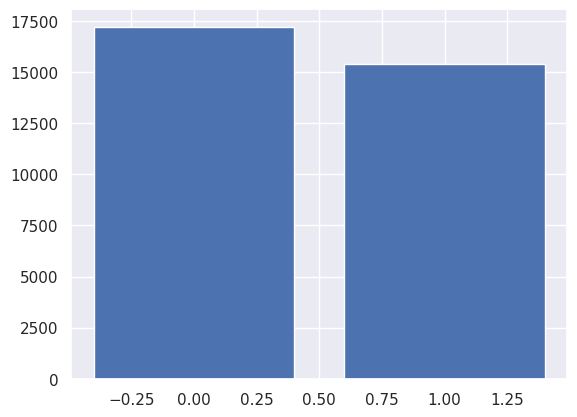

In [394]:
x = merged.drop(['final_result'], axis = 1)
y = merged['final_result']

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [192]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [243]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=17208 (50.000%)
Class=0, n=17208 (50.000%)


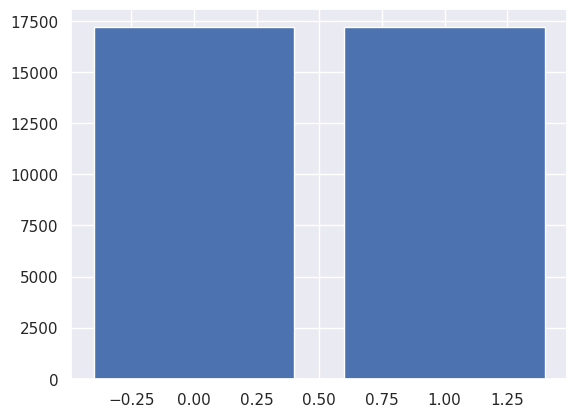

In [395]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#Forward selection

In [195]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [197]:
#pouzitim forward feature selection mi vysli tieto atributy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [198]:
#Pouzitie metody forward feature selection pricom som nastavila parametre ako napriklad k_features = 6, cize mi algoritmus vyberie 6 predikujucich atributov
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1),
                                                      k_features = 6,
                                                      forward = True, 
                                                      floating = False,
                                                      verbose = 2,
                                                      scoring = "accuracy",
                                                      cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.7min finished

[2023-05-15 20:15:20] Features: 1/6 -- score: 0.7696236298634909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.5min finished

[2023-05-15 20:18:52] Features: 2/6 -- score: 0.8397738955502604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min finished

[2023-05-15 20:21:52] Features: 3/6 -- score: 0.861857084490951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [245]:
forward_feature_selection.k_feature_idx_

(0, 3, 8, 13, 14, 15)

In [246]:
#Tu je vypis atributov, ktore mi vysli pomocou metody forward stepwise
forward_feature_selection.k_feature_names_

('code_module',
 'date_registration',
 'imd_band',
 'total_click',
 'weighted_score',
 'late_rate')

In [247]:
#Rovnako som pouzila aj metodu backward stepwise

In [248]:
backward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1),
                                                      k_features = 8,
                                                       forward = True, 
                                                      floating = False,
                                                      verbose = 2,
                                                      scoring = "accuracy",
                                                      cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   56.0s finished

[2023-05-15 20:42:51] Features: 1/8 -- score: 0.7649747165360307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min finished

[2023-05-15 20:44:15] Features: 2/8 -- score: 0.8354986932088986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min finished

[2023-05-15 20:45:23] Features: 3/8 -- score: 0.8605704243726683[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [249]:
backward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7)

In [250]:
backward_feature_selection.k_feature_names_

('code_module',
 'date_registration',
 'module_presentation_length',
 'region',
 'imd_band',
 'total_click',
 'weighted_score',
 'late_rate')

In [396]:
#V celom tomto procese som skusala vylepsovat moj model zmenou vstupnych parametrov
#Nakoniec som pouzila parametre ktore mi vyspi metodou backward feature selection 
#Funckie backward a forward stepwise su popisane nizsie
#merged1 = merged[['date_registration','module_presentation_length','gender','highest_education'
#                  ,'num_of_prev_attempts','studied_credits','disability','final_result','total_click','weighted_score']]

#Aj toto je celkom ok len sa bojim toho late a fail rate
#merged1 = merged[['date_registration','highest_education'
#                  ,'num_of_prev_attempts','studied_credits','disability','final_result','total_click','weighted_score','late_rate','fail_rate']]

#merged1 = merged[['id_student','date_registration','highest_education','gender','highest_education','age_band'
#                  ,'num_of_prev_attempts','studied_credits','final_result','total_click','weighted_score', 'fail_rate','late_rate']]

#merged1 = merged[['date_registration','highest_education','gender','num_of_prev_attempts','studied_credits','total_click','disability','final_result','weighted_score']]

#pouzitim forward feature selection mi vysli tieto atributy
#merged1 = merged[['code_module','date_registration','studied_credits','total_click', 'final_result','weighted_score','late_rate']]

#Na predikvoanie som ale pouzila atributy ktore mi vysli pouzitim metody backward stepwise selection pretoze som s nimi dosiahla najlepsie vysledky
merged1 = merged[['code_module','date_registration','module_presentation_length','region','imd_band', 'total_click','final_result','weighted_score','late_rate']]

Class=1, n=15385 (47.203%)
Class=0, n=17208 (52.797%)


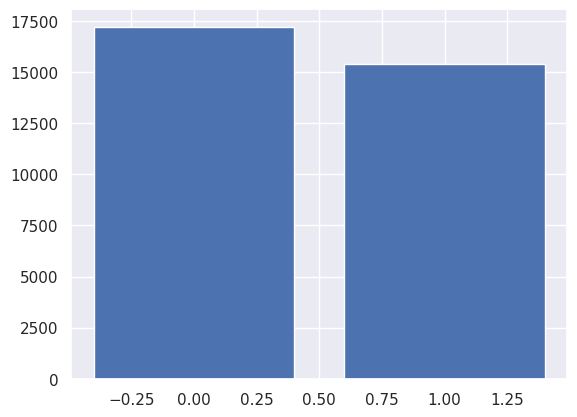

In [397]:
#Vytvorim si premennu x, ktora predstavuje predikovane atributy
#Premenna y je zase predikovany atribut final_result
x = merged1.drop(['final_result'], axis = 1)
y = merged1['final_result']

#Toto je len percentualne rozdelenie dvoch tried atributu final_result
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
#Vypis distribucie hodnot atributu final_result
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#Graficke zobrazenie hodnot atributu final_result
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=17208 (50.000%)
Class=0, n=17208 (50.000%)


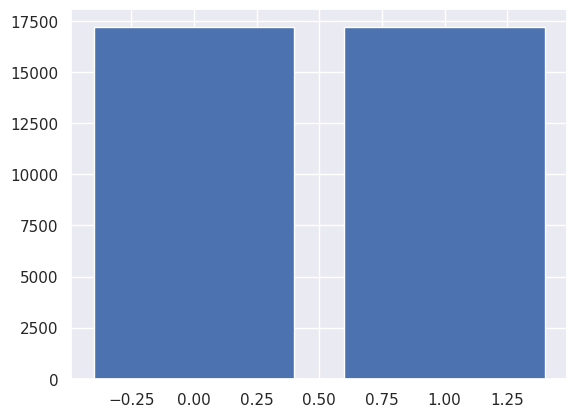

In [398]:
#Pouzitie metody oversampling SMOTE
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
#Vypis distribucie hodnot atributu final_result
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#Graficke zobrazenie hodnot atributu final_result
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [399]:
#ALGORITMUS NAHODNY LES

In [431]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [432]:
#Vyvorenie a natrenovanie modelu 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [433]:
#Vytvorenie premenej testPred_tree, ktora obsahuje predikovane hodnoty atributu final_result
testPred_tree = model.predict(X_test)

In [434]:
#Vypis kontingencnej tabulky
table = pd.crosstab(testPred_tree, y_test)
table

col_0,0,1
row_0,,
0,4193,300
1,969,4863


In [435]:
#vypis klasifikacneho reportu
from sklearn.metrics import classification_report
print(classification_report(y_test, testPred_tree))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5162
           1       0.83      0.94      0.88      5163

    accuracy                           0.88     10325
   macro avg       0.88      0.88      0.88     10325
weighted avg       0.88      0.88      0.88     10325



In [436]:
#Do testovacej mnoziny pridam atribut predict_value, ktory obsahuje predikovane hodnoty atributu final_result
#Tento atribut potom vyuzijem pri vizualizacii
X_test['predict_value'] = testPred_tree

In [437]:
X_test.head()

,code_module,date_registration,module_presentation_length,region,imd_band,total_click,weighted_score,late_rate,predict_value
5749,2,-24.0,234,8,2,267.0,68.9600,0.454545,1
10399,3,-141.0,241,13,3,1218.0,0.7000,1.000000,0
5017,2,-52.0,234,13,10,187.0,15.7400,0.666667,0
25320,6,-106.0,268,13,5,4749.0,82.0000,0.000000,1
15543,4,-53.0,261,13,7,1512.0,74.0625,0.000000,1


In [405]:
#ALGORITMUS LOGISTICKA REGRESIA

In [406]:
#logistics regression
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

#Vyvorenie  modelu2
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)


In [407]:
#Natrenovanie vytvoreneho modelu2
model2.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [408]:
#Vytvorenie premenej pred2, ktora obsahuje predikovane hodnoty atributu final_result
pred2 = model2.predict(X_test)

In [409]:
#Vypis kontingencnej tabulky
table2 = pd.crosstab(pred2, y_test)
table2

col_0,0,1
row_0,,
0,4009,761
1,1154,4401


In [410]:
#vypis klasifikacneho reportu
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5163
           1       0.79      0.85      0.82      5162

    accuracy                           0.81     10325
   macro avg       0.82      0.81      0.81     10325
weighted avg       0.82      0.81      0.81     10325



In [411]:
#ALGORITMUS K-NAJBLIZSICH SUSEDOV

In [412]:
#KNN
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

#Vyvorenie  modelu a natrenovanie modelu classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [413]:
#Vytvorenie premenej y_pred3, ktora obsahuje predikovane hodnoty
y_pred3 = classifier.predict(X_test)

In [414]:
#vypis klasifikacneho reportu
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report( y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      5162
           1       0.84      0.68      0.75      5163

    accuracy                           0.78     10325
   macro avg       0.79      0.78      0.77     10325
weighted avg       0.79      0.78      0.77     10325



In [415]:
#Vypis kontingencnej tabulky
crosstab3 = pd.crosstab(y_pred3,y_test)
crosstab3

col_0,0,1
row_0,,
0,4489,1647
1,673,3516


In [416]:
#ALGORITMUS NAIVNY BAYES

In [417]:
#Naive Bayes
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
#Vyvorenie  modelu a natrenovanie modelu clf
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [418]:
#Vytvorenie premenej y_pred4, ktora obsahuje predikovane hodnoty
y_pred4 = clf.predict(X_test)

In [419]:
#vypis klasifikacneho reportu
print(classification_report( y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      5163
           1       0.78      0.84      0.81      5162

    accuracy                           0.80     10325
   macro avg       0.80      0.80      0.80     10325
weighted avg       0.80      0.80      0.80     10325



In [420]:
#Vypis kontingencnej tabulky
table4 = pd.crosstab(y_pred4, y_test)
table4

col_0,0,1
row_0,,
0,3923,822
1,1240,4340


In [421]:
#ALGORITMUS GRADIENT BOOSTING CLASSIFIER

In [422]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [423]:
#Vyvorenie  modelu gradient_booster
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [424]:
#Natrenovanie vytvoreneho modelu 
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [425]:
#Vytvorenie premenej y_pred5, ktora obsahuje predikovane hodnoty
y_pred5 = gradient_booster.predict(X_test)

In [426]:
#vypis klasifikacneho reportu
print(classification_report( y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5162
           1       0.84      0.94      0.89      5163

    accuracy                           0.88     10325
   macro avg       0.89      0.88      0.88     10325
weighted avg       0.89      0.88      0.88     10325



In [427]:
#Vypis kontingencnej tabulky
table5 = pd.crosstab(y_pred5, y_test)
table5

col_0,0,1
row_0,,
0,4229,302
1,933,4861


In [429]:
pip install plotly

Text(0.5, 1.0, 'Graf závilosti váženého skóre od počtu kliknutí')

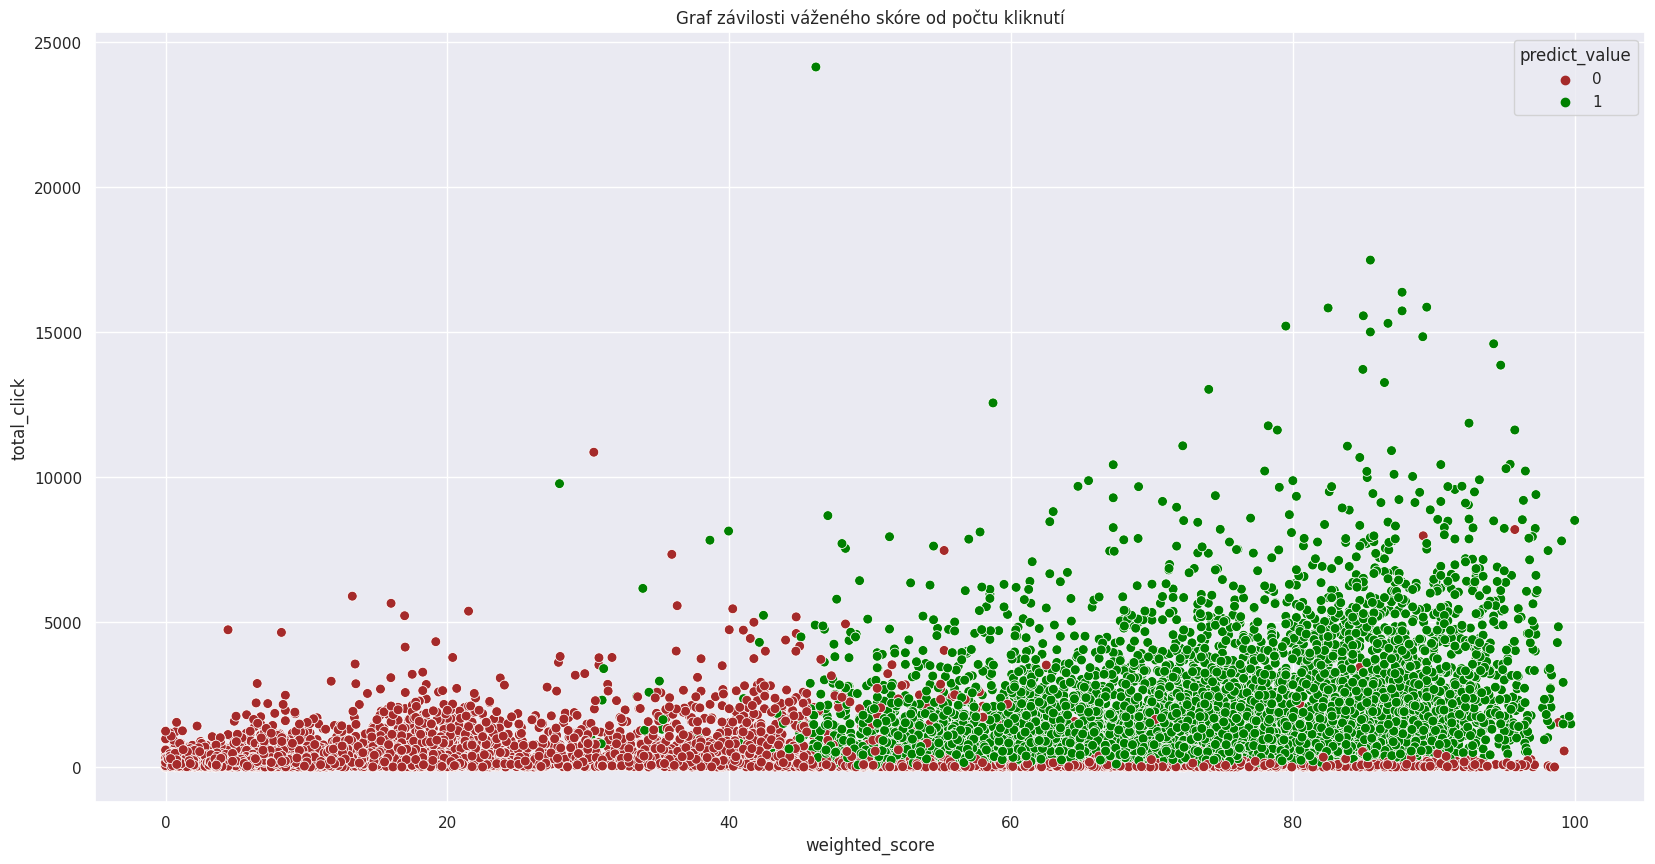

In [438]:
#Tento bodovy graf zobrazuje zavislosti atributu weighted_score od total_click, pricom studentov deli podla atributu predict_value (vytvoreny v casti, kde modelujem algoritmus Nahodny Les)
fig, axs = plt.subplots(figsize=(20,10), sharex=True, sharey=True)
sns.scatterplot(data=X_test, x='weighted_score', y='total_click', hue='predict_value', s = 50, palette=['brown', 'green'])
plt.title('Graf závilosti váženého skóre od počtu kliknutí')

Text(0.5, 1.0, 'Graf závilosti dátumu prihlásenia sa študentov na kurz od počtu kliknutí')

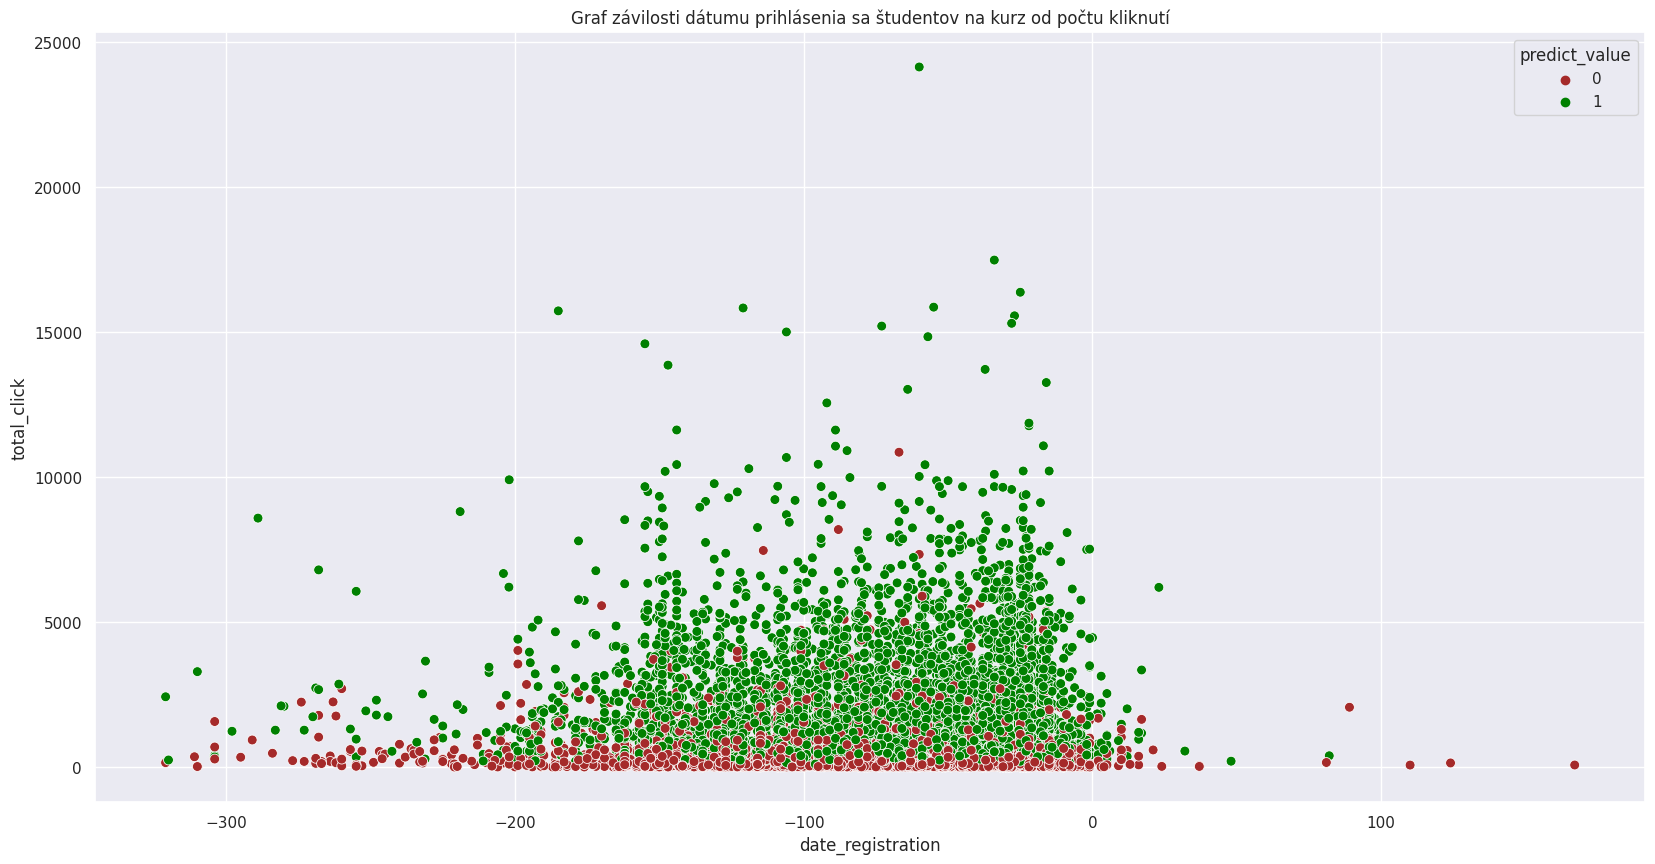

In [440]:
#Tento bodovy graf zobrazuje zavislosti atributu date_registration od total_click, pricom studentov deli podla atributu predict_value (vytvoreny v casti, kde modelujem algoritmus Nahodny Les)
fig, axs = plt.subplots(figsize=(20,10), sharex=True, sharey=True)
sns.scatterplot(data=X_test, x='date_registration', y='total_click', hue='predict_value', s = 50, palette=['brown', 'green'])
plt.title('Graf závilosti dátumu prihlásenia sa študentov na kurz od počtu kliknutí')